In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
custom_inv = [
    ['JavaFX', 'Django', 'Python'],
    ['JavaFX', 'Django', 'Python', 'Software Development'],
    ['Python', 'Django'],
    ['JavaFX', 'Apache Spark'],
    ['JavaFX'],
    ['Java', 'Django', 'Python'],
    ['Java', 'Django', 'Python', 'Software Development'],
    ['Python', 'Django'],
    ['Java', 'Apache Spark'],
    ['Java'],
    ['Python'],
    ['Python'],
    ['Python'],
    ['Python'],
    ['Python'],
    ['Python'],
    ['Mulching']
]

In [3]:
from coherence import InventoryCoherence

IC = InventoryCoherence(custom_inv, n_components=3)

In [15]:
IC.inventory

[['JavaFX', 'Django', 'Python'],
 ['JavaFX', 'Django', 'Python', 'Software Development'],
 ['Python', 'Django'],
 ['JavaFX', 'Apache Spark'],
 ['JavaFX'],
 ['Java', 'Django', 'Python'],
 ['Java', 'Django', 'Python', 'Software Development'],
 ['Python', 'Django'],
 ['Java', 'Apache Spark'],
 ['Java'],
 ['Python'],
 ['Python'],
 ['Python'],
 ['Python'],
 ['Python'],
 ['Python'],
 ['Mulching']]

In [16]:
IC.entity_count_dict

{'JavaFX': 4,
 'Python': 12,
 'Django': 6,
 'Software Development': 2,
 'Apache Spark': 2,
 'Java': 4,
 'Mulching': 1}

In [17]:
IC.entity_cooccurrence_dict

{frozenset({'Django', 'JavaFX'}): 2,
 frozenset({'JavaFX', 'Python'}): 2,
 frozenset({'Django', 'Python'}): 6,
 frozenset({'JavaFX', 'Software Development'}): 1,
 frozenset({'Django', 'Software Development'}): 2,
 frozenset({'Python', 'Software Development'}): 2,
 frozenset({'Apache Spark', 'JavaFX'}): 1,
 frozenset({'Django', 'Java'}): 2,
 frozenset({'Java', 'Python'}): 2,
 frozenset({'Java', 'Software Development'}): 1,
 frozenset({'Apache Spark', 'Java'}): 1}

In [18]:
IC.entity_probabilities

array([0.05333333, 0.16      , 0.08      , 0.02666667, 0.02666667,
       0.05333333, 0.01333333])

In [19]:
IC.cooccurrence_matrix

array([[ 4.,  2.,  2.,  1.,  1.,  0.,  0.],
       [ 2., 12.,  6.,  2.,  0.,  2.,  0.],
       [ 2.,  6.,  6.,  2.,  0.,  2.,  0.],
       [ 1.,  2.,  2.,  2.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  2.,  1.,  0.],
       [ 0.,  2.,  2.,  1.,  1.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.]])

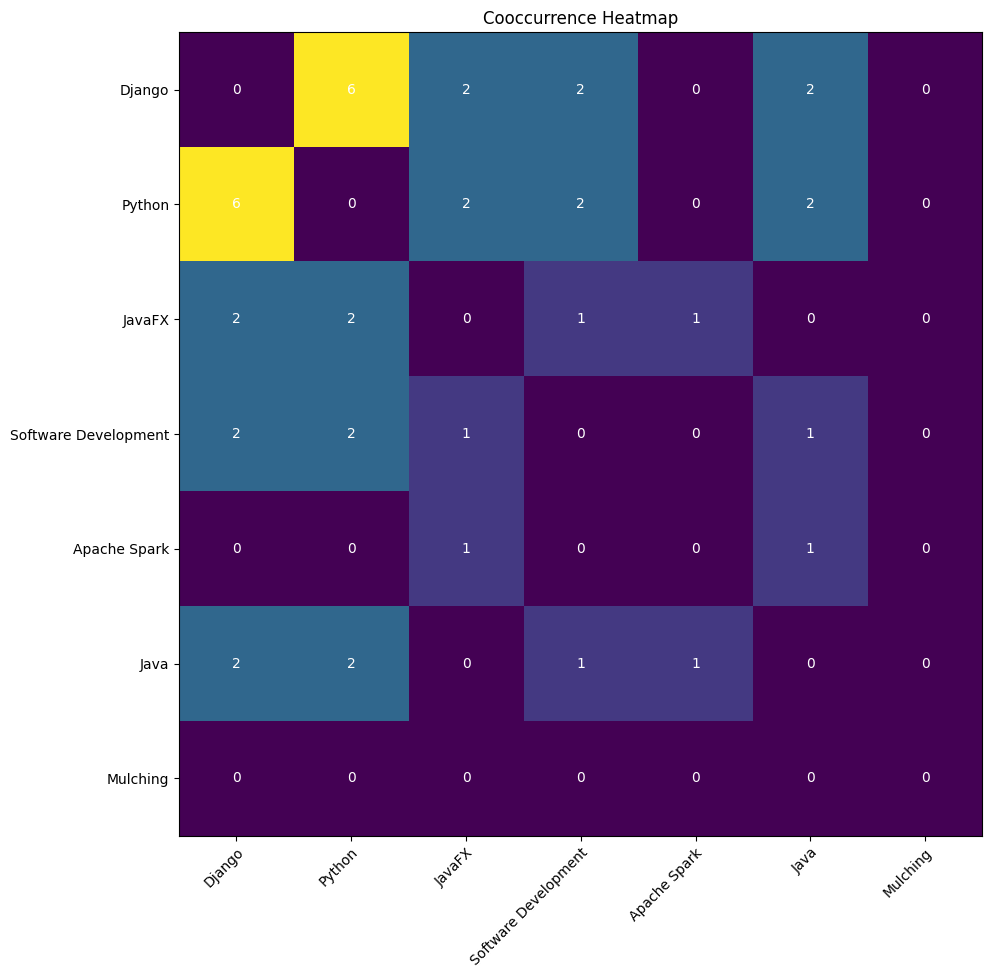

In [20]:
IC.plot_cooccurrence_heatmap(['Django', 'Python', 'JavaFX', 'Software Development', 'Apache Spark', 'Java', 'Mulching'], figsize=10)

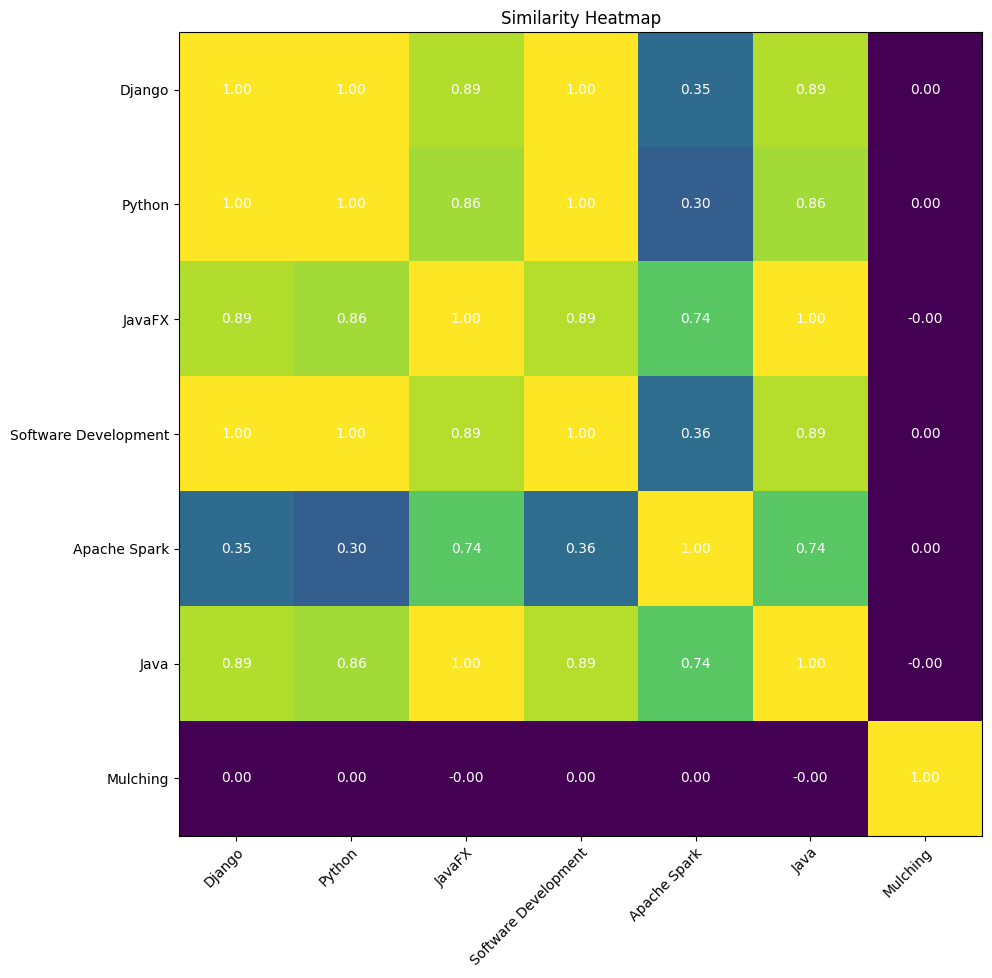

In [21]:
IC.plot_similarity_heatmap(['Django', 'Python', 'JavaFX', 'Software Development', 'Apache Spark', 'Java', 'Mulching'], figsize=10)

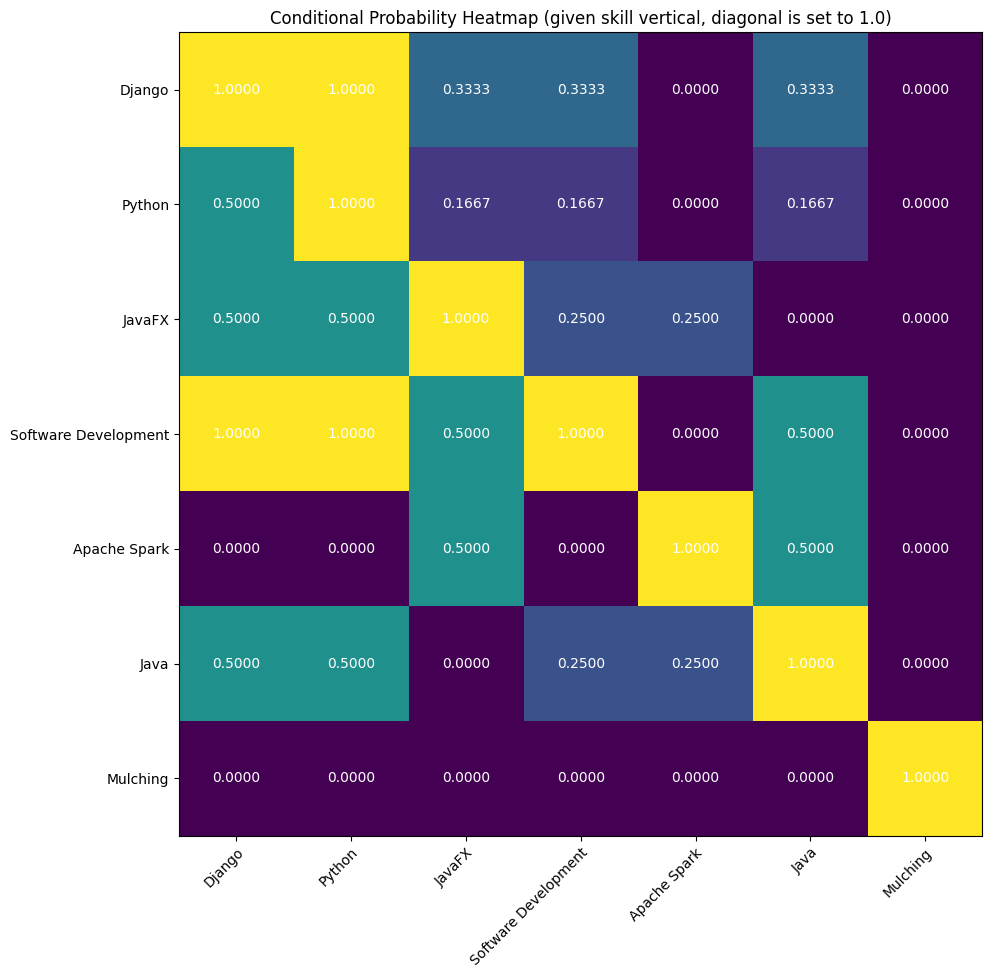

In [22]:
IC.plot_conditional_probability_heatmap(['Django', 'Python', 'JavaFX', 'Software Development', 'Apache Spark', 'Java', 'Mulching'], figsize=10)

In [23]:
IC.conditional_probability('Python', 'Django')

1.0

In [24]:
IC.similarity('Python', 'Django')

0.9986027284934867

In [26]:
IC.entity_count_dict['Java']

4

In [27]:
IC.entity_count_dict['Python']

12

In [28]:
IC.get_cooccurrence_matrix(['Java', 'Python'])

array([[ 4.,  2.],
       [ 2., 12.]])

In [29]:
IC.similarity(entity_a='Python', entity_b='Java')

0.8602961992615368

In [30]:
IC.conditional_probability(entity='Python', given_entity='Java')

0.5

In [31]:
IC.get_embeddings(["Python"]).shape

(1, 3)

In [32]:
import numpy as np

def get_top_matches(reference_entity, candidate_entities, top_k=3):
    # Retrieve embeddings for the reference entity and candidate entities
    reference_embedding = IC.get_embeddings([reference_entity]).reshape(-1)
    candidate_embeddings = IC.get_embeddings(candidate_entities).reshape(-1, 3)

    # Compute the cosine similarity between the reference and each candidate
    dot_products = np.dot(candidate_embeddings, reference_embedding)
    reference_norm = np.linalg.norm(reference_embedding)
    candidate_norms = np.linalg.norm(candidate_embeddings, axis=1)
    cosine_similarities = dot_products / (reference_norm * candidate_norms)

    # Get the top k indices with the highest cosine similarity scores
    top_k_indices = np.argsort(-cosine_similarities)[:top_k]

    # Return the top k candidate entities based on these indices
    top_matches = [candidate_entities[i] for i in top_k_indices]
    return top_matches

# Example usage
candidate_entities = ['Python', 'JavaFX', 'Software Development', 'Apache Spark', 'Java', 'Mulching']
top_matches = get_top_matches("Django", candidate_entities)
print("Top 3 Matches:", top_matches)


Top 3 Matches: ['Software Development', 'Python', 'Java']
